In [4]:
import os,sys

try:
    import this_is_root
except:
    os.chdir(os.path.pardir) # change workdir to be root dir
    sys.path.insert(0, os.path.realpath("."))

import csv
import itertools
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import torch

from regions_of_interest_module.regions_of_interest import find_points_of_interest
from image_manipulation.crop_image_for_classifier import crop, is_valid_size
from image_loader.Image2numpy import convert_image_file_to_numpy
from image_manipulation.standardize_image import normalize_image

# now comes the neural network
from noise_reduction.model_denoise import DenoiseNet
from spot_classifier_NN.classifier_model import spots_classifier_net as ClassifierNet

import create_training_data.training_data_generator

from tqdm.notebook import tqdm_notebook as pbar

imgs_generator = create_training_data.training_data_generator.ClassifierTrainingDataGenerator.make_default_training_data_generator(
    batch_size=100, num_channels=3)

TAG = 3
SMALL_COORDS = 1
IMG = 0

np.random.seed(30)

  0%|          | 0/100 [00:00<?, ?it/s]

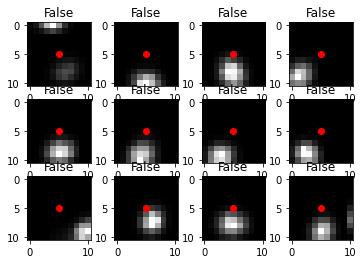

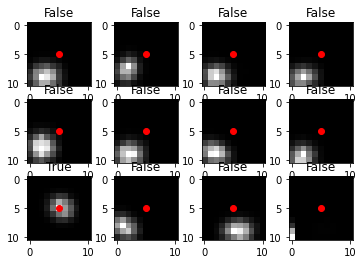

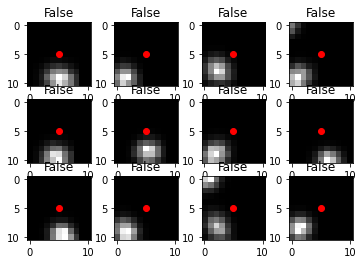

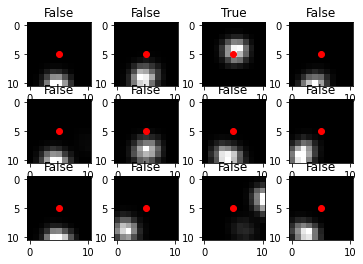

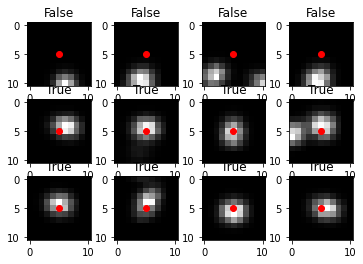

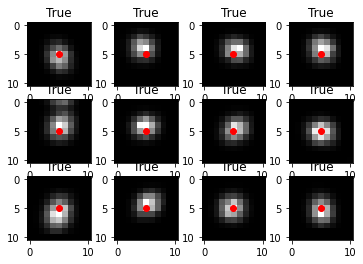

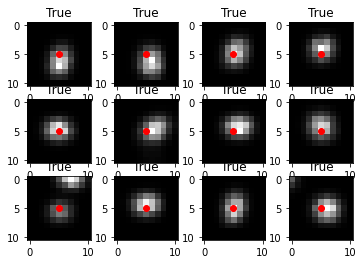

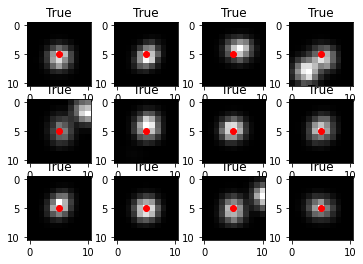

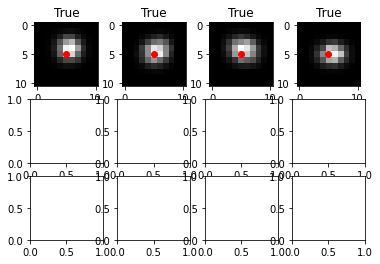

In [5]:
generated_data = imgs_generator.get_next_batch()
train_img, train_small_coordinates, train_label = generated_data[IMG], generated_data[SMALL_COORDS], generated_data[TAG]

axes_iter = None
for i in pbar(range(len(train_label))):
    if i % 12 == 0:
        fig,axis = plt.subplots(3,4)
        axes_iter = iter(list(axis.flatten()))
    ax = next(axes_iter)
    ch = train_small_coordinates[i][-1]
    z = train_small_coordinates[i][-2]
    ax.imshow(train_img[i][...,z,ch],cmap="gray")
    ax.plot(train_small_coordinates[i][1],train_small_coordinates[i][0],"or")
    ax.set_title(train_label[i])